In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [2]:

data= pd.read_csv("/Users/doriandjettchou/Documents/master1 IAD/second semester/BIG DATA/csv from Benito/train_clean_WITH_STOPWORDS_WITH_HASTAGWORDS.csv")


In [3]:
data_clean = data.copy()
data_clean = data_clean.loc[:, ['tweet_clean', 'label']]
print(data_clean)

                                             tweet_clean  label
0      when a father be dysfunctional and be so selfi...      0
1      thanks for lyft credit i can not use cause the...      0
2                                    bihday your majesty      0
3      model i love you take with you all the time in...      0
4                      factsguide society now motivation      0
...                                                  ...    ...
31957                                ate isz that youuu       0
31958  to see nina turner on the airwave try to wrap ...      0
31959  listen to sad song on a monday morning otw to ...      0
31960  sikh temple vandalise in in calgary wso condem...      1
31961                           thank you for you follow      0

[31962 rows x 2 columns]


In [4]:
#Nous avons divisé les données en ensemble de formation(train) et de test:
train, test = train_test_split(data_clean, test_size=0.2, random_state=1)
X_train = train['tweet_clean'].values.astype(str)
X_test = test['tweet_clean'].values.astype(str)
y_train = train['label']
y_test = test['label']

In [5]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

In [6]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [7]:
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1 ,1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                     n_jobs=-1) 


In [ ]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 12.9min finished


In [12]:
grid_svm.score(X_test, y_test)

0.9370332625509556

In [13]:
grid_svm.best_params_

{'svc__C': 0.1}

In [14]:
grid_svm.best_score_

0.9421836164354583

In [15]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result


In [16]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.9370433374149449,
 'f1': 0.6230158730158729,
 'acc': 0.9405599874863132,
 'precision': 0.5460869565217391,
 'recall': 0.7251732101616628}

In [17]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [18]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

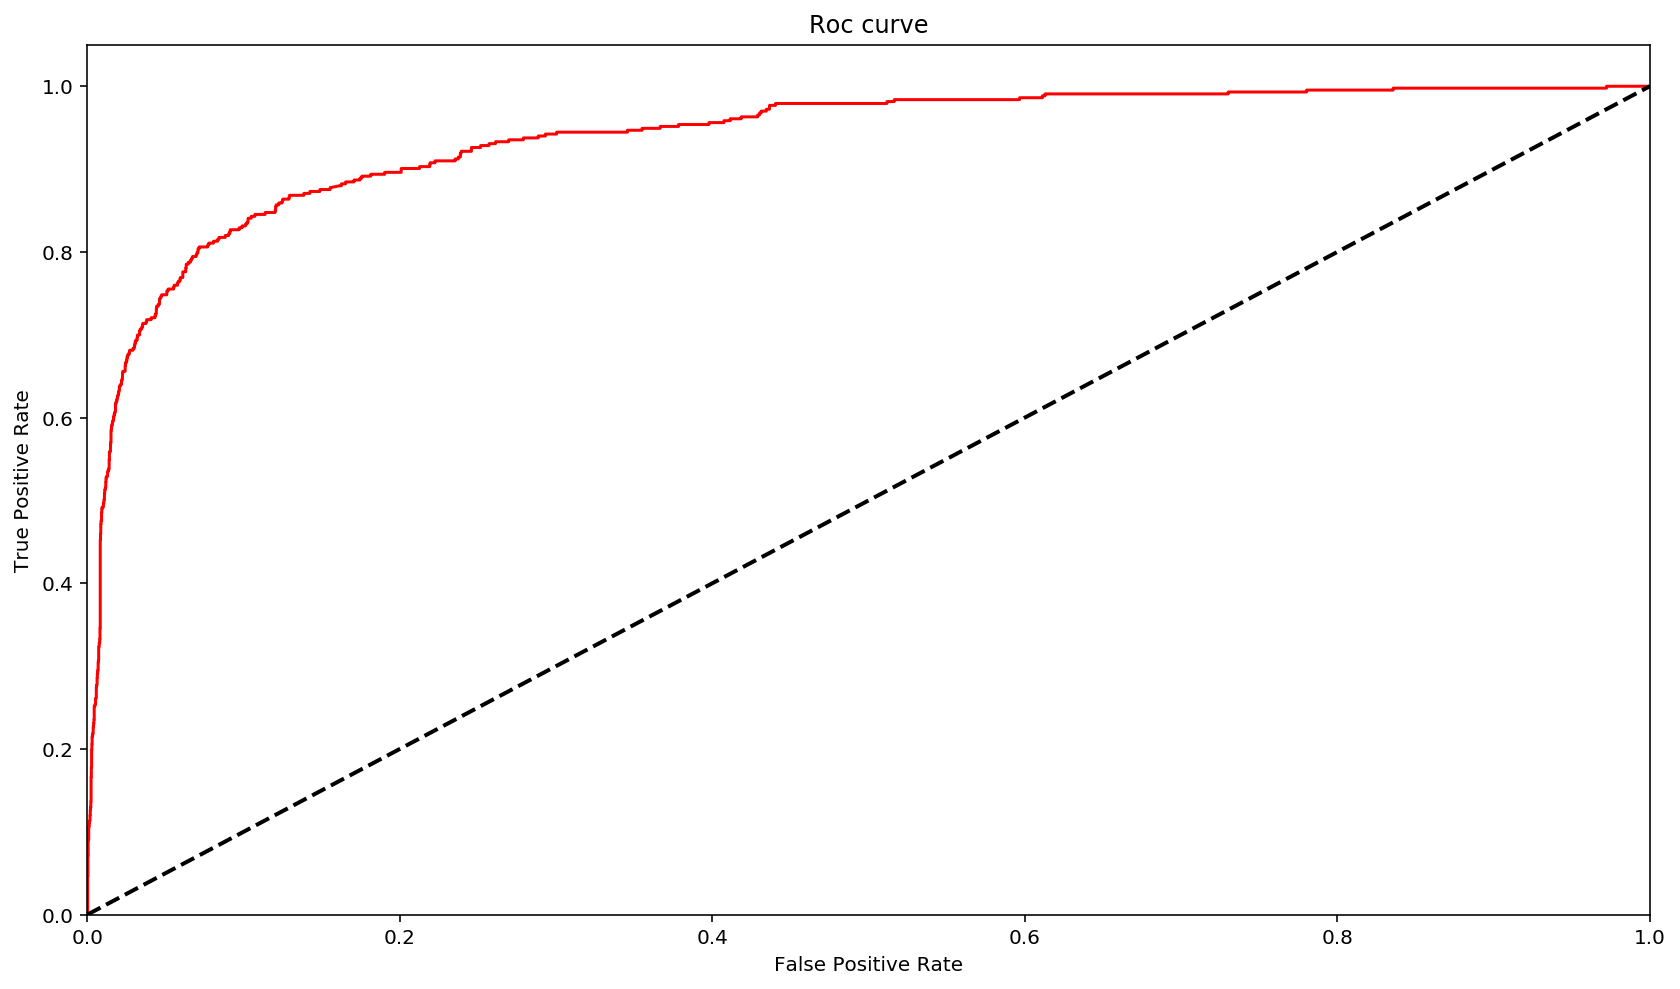

In [19]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

In [23]:
grid_svm.predict(["flying with united is always a great experience. If you don't lose your luggage"])


array([0])

In [42]:
grid_svm.predict(["sikh temple vandalise in in calgary wso condem"])


array([1])